In [1]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 9})

In [2]:
# Initialize these:
typeImg = "test" # photo/ cartoon/ top"
#numImg = "50" # 5 or 50
sz = 100
numColors = 37

In [3]:
# # Include imports
import glob
from skimage.transform import resize
from skimage.io import imread, imsave, imshow
import os
import pandas as pd
import numpy as np
import skimage.color as skcolor
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time

In [4]:
colNames = ["col_"+str(i) for i in range(numColors)] 
allConcepts = ["Paper", "Plastic", "Trash", "Compost", "Metal","Glass"]

# # Read data
# # Get the color ratings data -From file data_clean.csv
data = pd.read_csv("TestScripts/data_clean_test.csv",names = colNames)

# Get the LAB coordinates of colors from file LabOrig.csv
# # #colorData = pd.read_csv("LabOrig.csv",header=None)
colorData = pd.read_csv("TestScripts/Lab_test.csv",header=None)
colorDataRGB = pd.read_csv("TestScripts/RGB_test.csv",header=None)

category = pd.read_csv("TestScripts/Category_test.csv",header=None)
path = "E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads"
# if not os.path.exists( path + "/trainResized" ):
#    os.makedirs( path + "/trainResized/" )


In [5]:
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36
0,0.13510,0.30566,0.25250,0.20077,0.21622,0.45617,0.38230,0.24153,0.29612,0.51005,...,0.25852,0.16832,0.34235,0.26056,0.14352,0.162450,0.43541,0.73454,0.94781,0.99816
1,0.25500,0.28179,0.25704,0.20066,0.28949,0.32163,0.28429,0.15857,0.32000,0.33602,...,0.38342,0.25633,0.27168,0.24730,0.21372,0.303670,0.53347,0.72061,0.77847,0.78633
2,0.13031,0.21107,0.23602,0.37719,0.25760,0.28020,0.40837,0.75372,0.22796,0.31219,...,0.32526,0.10612,0.14628,0.19806,0.18719,0.745410,0.74628,0.67842,0.45653,0.29219
3,0.10582,0.22423,0.29704,0.35684,0.26128,0.35179,0.52622,0.82592,0.30607,0.32730,...,0.29531,0.11332,0.13485,0.14832,0.18597,0.498110,0.59270,0.58827,0.37031,0.30015
4,0.11036,0.15791,0.18842,0.28520,0.15138,0.14964,0.22046,0.38776,0.16041,0.21454,...,0.32449,0.11245,0.11653,0.13684,0.12036,0.659640,0.94730,0.91128,0.65408,0.42536
5,0.11704,0.18582,0.21806,0.15286,0.16092,0.28347,0.28434,0.13255,0.19444,0.33439,...,0.47577,0.12173,0.30408,0.21148,0.12449,0.095255,0.44714,0.65577,0.79760,0.73745


In [6]:
# Count total number of images
count = 0
for i in allConcepts:
    print(path + "/" +typeImg +"/" +i+"/*.*")
    trainFiles = glob.glob( path + "/" +typeImg +"/" +i+"/*.*" )
    count = count + len(trainFiles[:50])
    #print(count)
print("Category: ",typeImg)
print("Total images : ",count)

E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Paper/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Plastic/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Trash/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Compost/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Metal/*.*
E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads/test/Glass/*.*
Category:  test
Total images :  300


In [7]:
# import matlab.engine
# def getCategoriesMatrix(imageFileName,sz):
#     ## Get total pixel counts of all 11 categories for this imageFile
#     eng = matlab.engine.start_matlab()
#     imageCat = np.array(eng.getCategories(imageFileName,sz))
#     eng.quit()
#      # imageCat : sz x sz matrix where each pixel has its category
#     return imageCat

# def getSegmentedImage(imageFileName,sz): # Returns segmented pixels in LAB and its corresponding color category.
#     eng = matlab.engine.start_matlab()
#     segImg, segImgCat = eng.activeContourSegmentation(imageFileName,sz, nargout=2)
#     eng.quit()
#     segImg = np.array(segImg)/255;
#     segImg = skcolor.rgb2lab(segImg)
#     segImgCat = np.array(segImgCat)
#     return segImg, segImgCat


In [8]:
# numFt = 3
# X = np.zeros((count*numColors,numFt+1) )  # +1 for label #Number of features [] # Feature Vector -- 58N rows
# init = time.time()
# rowNum = -1
# strtInd = []  # To keep track of the starting indices of fruits in the feature matrix
# cvInd = 1 
# counter = 0
# sz = 100    # Size of image: 100 by 100
# # ########
# # allConcepts = ['Glass']
# # rowNum = 9249
# # counter = 9249

# # ##
# Rc = [1,10,20,30,40]   # Radii thresholds
# Li = [40]              #[1, 10, 20, 30, 40]
# R = [40]               #[1, 10, 20, 30, 40]     # same as L
# hueAngle = [40]        #[5, 10, 20, 30, 40] # Hue Angle
# ##
# for conceptNum,concept in enumerate(allConcepts):
#     #conceptNum = 5
#     t0 = time.time()
#     print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>\n",conceptNum+1,": Concept : ",concept)
#     # Get label for corresponding fruit (for given color)
#     #label = data.loc[conceptNum]['col_'+str(color)]
#     ct = 0    # Keeps track of images inside a category
#     strtInd.append(counter)
#     trainFiles = glob.glob( path + "/" +typeImg +"/" +concept+"/*.*" )
#     print("\tTotal number of images for ",concept," : ",len(trainFiles))
#     t = []
#     for m, nameFile in enumerate(trainFiles[:50]):
#         t1 = time.time()
#         #print("\nReading file ......")
#         ct = ct + 1
        
#         image = imread( nameFile )
#         imageResized = resize( image, (sz,sz),anti_aliasing=True,mode='reflect')
#         img = imageResized
#         # Convert the pixels in  image to LAB space
#         imgLAB = skcolor.rgb2lab(img)
#         segmentedImg,segmentedImgCat = getSegmentedImage(nameFile,sz)
#         imageWithCategories = getCategoriesMatrix(nameFile,sz)
        
#         i1 = imgLAB[27:72,27:72,:] 
# #         i2 = imgLAB[19:83,19:83,:]
# #         i3 = imgLAB[12:90,12:90,:]
# #         i4 = imgLAB[6:96,6:96,:]
# #         i5 = np.copy(imgLAB)
#         i6 = np.copy(segmentedImg)
        
#         ii1 = imageWithCategories[27:72,27:72].flatten()
# #         ii2 = imageWithCategories[19:83,19:83].flatten()
# #         ii3 = imageWithCategories[12:90,12:90].flatten()
# #         ii4 = imageWithCategories[6:96,6:96].flatten()
# #         ii5 = np.copy(imageWithCategories).flatten()
# #         ii6 = np.copy(segmentedImgCat).flatten()
        
#         categoryImg1 = [sum(1 for p in ii1 if p-1 == k)/ii1.size for k in range(11)]
# #         categoryImg2 = [sum(1 for p in ii2 if p-1 == k)/ii2.size for k in range(11)]
# #         categoryImg3 = [sum(1 for p in ii3 if p-1 == k)/ii3.size for k in range(11)]
# #         categoryImg4 = [sum(1 for p in ii4 if p-1 == k)/ii4.size for k in range(11)]
# #         categoryImg5 = [sum(1 for p in ii5 if p-1 == k)/ii5.size for k in range(11)]
# #         categoryImg6 = [sum(1 for p in ii6 if p-1 == k)/ii6.size for k in range(11)]
        
        
#         for color in range(numColors):
#             rowNum+=1
#             counter += 1
#             colCt = 0
#             # Thus begin the long long process
#             # Get spherical and add till 
#             colorLAB = np.array(colorData.loc[color])   #get LAB values for specific color
            
# #             ##   Columns 1-30
# #             for i in range(6):
# #                 if i == 0:
# #                     distPixel = skcolor.deltaE_cie76(i1,colorLAB)
# #                 elif i == 1:
# #                     distPixel = skcolor.deltaE_cie76(i2,colorLAB)
# #                 elif i == 2:
# #                     distPixel = skcolor.deltaE_cie76(i3,colorLAB)
# #                 elif i == 3:
# #                     distPixel = skcolor.deltaE_cie76(i4,colorLAB)
# #                 elif i == 4:
# #                     distPixel = skcolor.deltaE_cie76(i5,colorLAB)
# #                 else:
# #                     distPixel = skcolor.deltaE_cie76(i6,colorLAB)
# #                 distPixel = distPixel.flatten()
# #                 #print(distPixel.size)
# #                 for j,threshold in enumerate(Rc):
# #                     num = sum(1 for t in distPixel  if t <= threshold)/distPixel.size
# #                     #features.append(num)
# #                     X[rowNum,colCt] = num
                    
# #                     colCt+=1
#             #print(colCt)
            
#             # For features 31-180
#             #for i in range(6):
#             for i in [0,5]:
#                 if i == 0:
#                     L = i1[:,:,0]
#                     a = i1[:,:,1]
#                     b = i1[:,:,2]
#                 elif i == 1:
#                     L = i2[:,:,0]
#                     a = i2[:,:,1]
#                     b = i2[:,:,2]
#                 elif i == 2:
#                     L = i3[:,:,0]
#                     a = i3[:,:,1]
#                     b = i3[:,:,2]
#                 elif i == 3:
#                     L = i4[:,:,0]
#                     a = i4[:,:,1]
#                     b = i4[:,:,2]
#                 elif i == 4:
#                     L = i5[:,:,0]
#                     a = i5[:,:,1]
#                     b = i5[:,:,2]
#                 else:
#                     L = i6[:,:,0]
#                     a = i6[:,:,1]
#                     b = i6[:,:,2]
                    
#                 LTemp = L.flatten()
#                 r = np.sqrt(a**2+b**2).flatten()
#                 theta = np.degrees(np.arctan2(b,a)).flatten()

#                 L_diff = np.abs(LTemp - colorLAB[0])
#                 r_diff = np.abs(r - (np.sqrt(colorLAB[1]**2 + colorLAB[2]**2)))
#                 theta_diff = np.abs(theta - np.degrees(np.arctan2(colorLAB[2],colorLAB[1])))

#                 for j,r_th in enumerate(R):
#                     l_th = Li[j] # L and R are the same.
#                     for theta_th in hueAngle:
#                         pixels = 0
#                         for p in range(len(L_diff)):
#                             if (L_diff[p] <= l_th and r_diff[p] <= r_th and theta_diff[p] <= theta_th) or (L_diff[p] <= l_th and r_diff[p] <= 2.5):
#                                 pixels += 1
#                         X[rowNum,colCt] = pixels/(len(L_diff))
#                         colCt+=1
#             #print(colCt)
            
#             colorCat = category.loc[color,0] 
#             X[rowNum,colCt] = categoryImg1[colorCat-1]
#             colCt+=1
#             #print(colCt)

# #             X[rowNum,colCt] = categoryImg2[colorCat-1]
# #             colCt+=1
# #             X[rowNum,colCt] = categoryImg3[colorCat-1]
# #             colCt+=1
# #             X[rowNum,colCt] = categoryImg4[colorCat-1]
# #             colCt+=1
# #             X[rowNum,colCt] = categoryImg5[colorCat-1]
# #             colCt+=1
# #             X[rowNum,colCt] = categoryImg6[colorCat-1]
# #             colCt+=1
#             label = data.loc[conceptNum]['col_'+str(color)]   
#             X[rowNum,colCt] = label
#             #print(colCt)
#         h = time.time()-t1
#         print("\t\t",m, "image: ",h ," seconds")
#         t.append(h)
#     print(t)
#     print("\t** Time elapsed since last category: ",time.time()-t0," seconds **")
# strtInd.append(len(X))
# print(strtInd)
# print("** Total Time elapsed: ",time.time()-init," seconds **")

In [9]:
# ## convert your array into a dataframe
# xxTemp = np.copy(X)
# #y = np.copy(X[:,-1])
# df = pd.DataFrame(xxTemp)
# ## save to xlsx file

# filepath = 'dataTEST50.xlsx'
# df.to_excel(filepath, index=False)
# tot = len(xxTemp)

In [10]:
# for conceptNum,concept in enumerate(allConcepts):
#     t0 = time.time()
#     print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>\n",conceptNum+1,": Concept : ",concept)
#     # Get label for corresponding fruit (for given color)
#     #label = data.loc[conceptNum]['col_'+str(color)]
#     ct = 0    # Keeps track of images inside a category
#     trainFiles = glob.glob( path + "/" +typeImg +"/" +concept+"/*.*" )
#     print("\tTotal number of images for ",concept," : ",len(trainFiles))
#     t = []
#     for m, nameFile in enumerate(trainFiles[:50]):
#         print(nameFile)
#         p = imread(nameFile)
#         imageResized = resize( p, (sz,sz),anti_aliasing=True,mode='reflect')
        

In [11]:
# trainFiles = glob.glob( path + "/" +typeImg +"/" +"Glass/*.*" )
# for m, nameFile in enumerate(trainFiles[8:50]):
#         image = imread( nameFile )
#         print(nameFile)
#         imageResized = resize( image, (sz,sz),anti_aliasing=True,mode='reflect')
#         img = imageResized
#         # Convert the pixels in  image to LAB space
#         imgLAB = skcolor.rgb2lab(img)


# Analysis

In [12]:
strtInd = [0, 1850, 3700, 5550, 7400, 9250, 11100]

In [13]:
filepath = 'dataTEST50.xlsx'
df = pd.read_excel(filepath)
Q = df.as_matrix()
Q.shape

(11100, 4)

In [14]:
len(Q)

11100

In [15]:
Xtest = np.column_stack([np.ones((len(Q),1)), Q[:,:-1]])
ytest = np.copy(Q[:,-1])
weights = [0.13858045, 0.13921446, 0.12137094, 0.30032727]
#[0.13772196, 0.11861657, 0.12768021, 0.32313017]

In [16]:
y_predAll = Xtest.dot(weights)

In [17]:
np.array([[3, 5, 6],[5, 6, 7]]).dot(np.array([1, 1,2]))

array([20, 25])

In [18]:
ytest.shape

(11100,)

In [19]:
from scipy import stats
plt.close('all')
win0_50 = []
win1_50 = []
win2_50 = []

correlation_50 = []
error_50 = []

for i in range(len(strtInd)-1):
    # Leave one entire fruit group
    testFruit =  allConcepts[i]
    #print("\nLeaving out fruit group : ",allConcepts[i])
    y_pred = np.copy(y_predAll[strtInd[i]:strtInd[i+1]])
    y_test = np.copy(ytest[strtInd[i]:strtInd[i+1]])
    print(y_pred.shape)
    totalTestImages = y_pred.size/numColors  #37N rows -> every image has 37 rows of data
    avg_pred =[np.sum([y_pred[p] for p in range(q,y_pred.size,numColors)])/totalTestImages for q in range(numColors)]

    # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
    trueRating = np.copy(y_test[0:numColors])
    
    sqErr = np.sum(pow(avg_pred - trueRating,2))
    print("The true squared error (in color ratings) for left out fruit",testFruit,"is: %.4f" % sqErr)
    
    corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)
    
    print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
    print("p-value %.4f" %pVal)

    error_50.append(sqErr)
    correlation_50.append(corrCoeff)
    win0_50.append(corrCoeff) # saves correlation for test fruit
    win1_50.append(trueRating) # saves true rating for test fruit
    win2_50.append(avg_pred)   # saves avg predicted rating for test fruit
    # Plot average color rating over all test images.
#     fig= plt.figure(figsize=(10,3))
#     barPlot = plt.bar(range(1,numColors+1),avg_pred,color = colorDataRGB.values,edgeColor = [0, 0, 0])
#     plt.ylabel('Ratings')
#     plt.xlabel('Colors')
#     plt.title('Predicted color ratings for Concept : %s' %testFruit)
#     plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
#     plt.ylim(0,1)
#     plt.show()

#     fig= plt.figure(figsize=(10,3))
#     barPlot = plt.bar(range(1,numColors+1), trueRating,color = colorDataRGB.values,edgeColor = [0, 0, 0])
#     plt.ylabel('Ratings')
#     plt.xlabel('Colors')
#     plt.title('True color ratings for Concept : %s' %testFruit)
#     plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
#     plt.ylim(0,1)
#     plt.show()

#     # Scatter plot
#     fig2 = plt.figure(figsize=(7,7))
#     plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,s=80,marker = 'o',linewidths=0.5,edgeColor = [0, 0, 0])
#     plt.ylabel('Predicted Ratings')
#     plt.xlabel('Subject Ratings')
#     plt.title('Scatter plot of color ratings for : %s' %testFruit)
#     plt.axis('equal')
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     plt.show() 

(1850,)
The true squared error (in color ratings) for left out fruit Paper is: 1.9019

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8791
p-value 0.0000
(1850,)
The true squared error (in color ratings) for left out fruit Plastic is: 1.4073

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.4048
p-value 0.0130
(1850,)
The true squared error (in color ratings) for left out fruit Trash is: 1.9371

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.5151
p-value 0.0011
(1850,)
The true squared error (in color ratings) for left out fruit Compost is: 1.8387

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6639
p-value 0.0000
(1850,)
The true squared error (in color ratings) for left out fruit Metal is: 0.8006

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8719
p-value 0.0000
(1850,)
The true squa

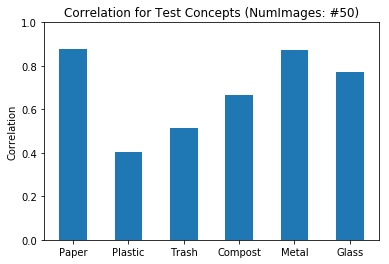

In [20]:
plt.close('all')
barWidth = 0.5
plt.bar(range(1,7),win0_50, width = barWidth)
plt.xticks(range(1,7),allConcepts)
plt.title("Correlation for Test Concepts (NumImages: #50)")
plt.ylabel('Correlation')
plt.ylim(0,1)
plt.show()

In [140]:
correlation_50

[0.8791125311273522,
 0.40479140380407114,
 0.5151289246513693,
 0.6639181954905902,
 0.8719009745606465,
 0.7730519771971549]

In [141]:
allConcepts

['Paper', 'Plastic', 'Trash', 'Compost', 'Metal', 'Glass']

# Scatter Plots 

In [138]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 9})
def createScatterPlots(indices, win0, win1, win2,numImages):
    model_num = 3
    print("----------------------- Creating plots for Model ---------------Sector+Category")
    # print(indices)
    # print(win0)
    
    k = 1
    plt.close('all')
    plt.subplots(2,3,figsize=(5,4))
    for i in range(len(indices)-1,-1,-1):
        # Scatter plot

        arg = indices[i]
        trueRating = win1[arg]
        avg_pred = win2[arg]

        ax = plt.subplot(2,3,k,aspect='equal') #plt.figure(figsize=(7,7))
        #ax = f.add_subplot(3,4,k)
        plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,marker = 'o',s=15)
        if k == 1 or k == 4:
            plt.ylabel('Mean Predicted Rating')
        plt.xlabel('Mean Rating')
        s = allConcepts[arg]+"( %.2f )" %win0[arg]
        #print(s)
        plt.title(s)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.yticks([0,0.5,1])
        plt.xticks([0,0.5,1])
        plt.tick_params(direction='in')
        plt.plot(np.unique(trueRating), np.poly1d(np.polyfit(trueRating, avg_pred, 1))(np.unique(trueRating)),'k--')
        k = k+1
    plotName = "Test_ScatterPlot_Model_"+str(numImages)+".pdf"
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.savefig(plotName, bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
    


----------------------- Creating plots for Model ---------------Sector+Category


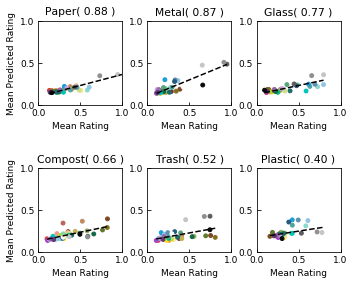

In [139]:
indices = np.argsort(win0_50)
createScatterPlots(indices, win0_50, win1_50, win2_50,50)

# Analysis using just top 5

In [21]:
numColors

37

In [22]:
from scipy import stats
plt.close('all')
win0_5 = []
win1_5 = []
win2_5 = []

correlation_5 = []
error_5 = []

for i in range(len(strtInd)-1):
    # Leave one entire fruit group
    testFruit =  allConcepts[i]
    #print("\nLeaving out fruit group : ",allConcepts[i])
    y_pred = np.copy(y_predAll[strtInd[i]:strtInd[i]+(5*numColors)])
    
    y_test = np.copy(ytest[strtInd[i]:strtInd[i]+(5*numColors)])
    print(y_pred.shape)
    totalTestImages = y_pred.size/numColors  #37N rows -> every image has 37 rows of data
    print("Total test images: ",  totalTestImages)
    avg_pred = np.array([np.sum([y_pred[p] for p in range(q,y_pred.size,numColors)])/totalTestImages for q in range(numColors)])
    #print(avg_pred)
    # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
    trueRating = np.copy(y_test[0:numColors])
   
    sqErr = np.sum(pow(avg_pred - trueRating,2))
    print("The true squared error (in color ratings) for left out fruit",testFruit,"is: %.4f" % sqErr)
    
    corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)
    
    print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
    print("p-value %.4f" %pVal)

    error_5.append(sqErr)
    correlation_5.append(corrCoeff)
    win0_5.append(corrCoeff) # saves correlation for test fruit
    win1_5.append(trueRating) # saves true rating for test fruit
    win2_5.append(avg_pred)   # saves avg predicted rating for test fruit
    # Plot average color rating over all test images.
#     fig= plt.figure(figsize=(10,3))
#     barPlot = plt.bar(range(1,numColors+1),avg_pred,color = colorDataRGB.values,edgeColor = [0, 0, 0])
#     plt.ylabel('Ratings')
#     plt.xlabel('Colors')
#     plt.title('Predicted color ratings for Concept : %s' %testFruit)
#     plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
#     plt.ylim(0,1)
#     plt.show()

#     fig= plt.figure(figsize=(10,3))
#     barPlot = plt.bar(range(1,numColors+1), trueRating,color = colorDataRGB.values,edgeColor = [0, 0, 0])
#     plt.ylabel('Ratings')
#     plt.xlabel('Colors')
#     plt.title('True color ratings for Concept : %s' %testFruit)
#     plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
#     plt.ylim(0,1)
#     plt.show()

#     # Scatter plot
#     fig2 = plt.figure(figsize=(7,7))
#     plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,s=80,marker = 'o',linewidths=0.5,edgeColor = [0, 0, 0])
#     plt.ylabel('Predicted Ratings')
#     plt.xlabel('Subject Ratings')
#     plt.title('Scatter plot of color ratings for : %s' %testFruit)
#     plt.axis('equal')
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     plt.show() 

(185,)
Total test images:  5.0
The true squared error (in color ratings) for left out fruit Paper is: 2.1064

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7748
p-value 0.0000
(185,)
Total test images:  5.0
The true squared error (in color ratings) for left out fruit Plastic is: 1.2363

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.4704
p-value 0.0033
(185,)
Total test images:  5.0
The true squared error (in color ratings) for left out fruit Trash is: 2.0598

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.3528
p-value 0.0322
(185,)
Total test images:  5.0
The true squared error (in color ratings) for left out fruit Compost is: 1.7882

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6194
p-value 0.0000
(185,)
Total test images:  5.0
The true squared error (in color ratings) for left out fruit Metal is: 1.3191

Pearson’s corr

In [23]:
correlation_5

[0.7747773958718557,
 0.47041800827547775,
 0.352817565211452,
 0.6194062997528875,
 0.48291107345545164,
 0.5079749422303076]

In [24]:
correlation_50

[0.8791125311273522,
 0.40479140380407114,
 0.5151289246513693,
 0.6639181954905902,
 0.8719009745606465,
 0.7730519771971549]

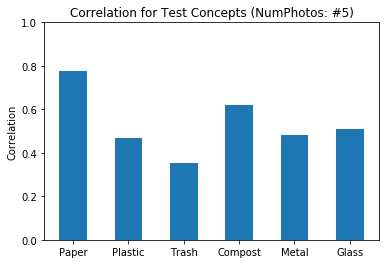

In [25]:
barWidth = 0.5
plt.bar(range(1,7),win0_5, width = barWidth)
plt.xticks(range(1,7),allConcepts)
plt.title("Correlation for Test Concepts (NumPhotos: #5)")
plt.ylabel('Correlation')
plt.ylim(0,1)
plt.show()

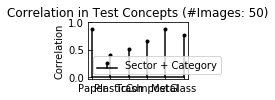

In [26]:
plt.close('all')
barWidth = 0.1
#r1 = [0.4,0.8,1.2,1.6,2,2.4]
r1 = [0.1,0.4,0.7,1,1.3,1.6]
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

#t.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
fig = plt.figure(figsize =(3,1.5)) # (12,6)

mline3 = plt.stem(r1,correlation_50,label='Sector + Category')
plt.setp(mline3, color=[0,0,0], linewidth=1.5, markersize = 3)

plt.xticks(r1,allConcepts)
plt.yticks([0,0.5,1])
plt.tick_params(direction='in')
plt.title("Correlation in Test Concepts (#Images: 50)")
plt.ylabel('Correlation')
plt.legend()

plt.tight_layout()
plt.savefig('Exp3_Correlation.pdf')
plt.show()


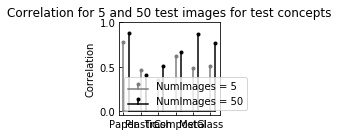

In [27]:
plt.close('all')
barWidth = 0.3
r1 = range(1,7)
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

#t.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
fig = plt.figure(figsize =(3.5,2)) # (12,6)
#linefmt=None, markerfmt=None, basefmt=None, bottom=0, label=None
# mline1 = plt.stem(r1,[topErr[0],photoErr[0],cartErr[0]], linefmt='-',label='Model 1')
# plt.setp(mline1, color=[0.737,0.737,0.737], linewidth=1.5, markersize = 3)
# #plt.setp(sline1, linewidth=0.8)


mline2 = plt.stem(r1,correlation_5,label='NumImages = 5')
plt.setp(mline2, color=[0.486,0.486,0.486], linewidth=1.5, markersize = 3)

mline3 = plt.stem(r2,correlation_50,label='NumImages = 50')
plt.setp(mline3, color=[0,0,0], linewidth=1.5, markersize = 3)


plt.xticks(r1,allConcepts)
plt.yticks([0,0.5,1])
plt.tick_params(direction='in')
plt.title("Correlation for 5 and 50 test images for test concepts")
plt.ylabel('Correlation')
plt.legend()

plt.tight_layout()
plt.savefig('Exp3_DiffNumImages_Correlation.pdf')
plt.show()


In [28]:
error_50

[1.9019227230146638,
 1.407303811767055,
 1.9371400882005407,
 1.8387030863792606,
 0.8006076720127271,
 2.0554486581870988]

In [29]:
error_5

[2.1063782743313366,
 1.2363033340270593,
 2.0597992465468526,
 1.7881955318763285,
 1.3190833851556205,
 2.393779656168634]

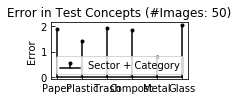

In [30]:
plt.close('all')
barWidth = 0.1
#r1 = range(1,7)
r1 = [0.1,0.4,0.7,1,1.3,1.6]
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

#t.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
fig = plt.figure(figsize =(3,1.5)) # (12,6)
#linefmt=None, markerfmt=None, basefmt=None, bottom=0, label=None
# mline1 = plt.stem(r1,[topErr[0],photoErr[0],cartErr[0]], linefmt='-',label='Model 1')
# plt.setp(mline1, color=[0.737,0.737,0.737], linewidth=1.5, markersize = 3)
# #plt.setp(sline1, linewidth=0.8)


# mline2 = plt.stem(r1,[topErr[1],photoErr[1],cartErr[1]],label='Model 2')
# plt.setp(mline2, color=[0.486,0.486,0.486], linewidth=1.5, markersize = 3)

mline3 = plt.stem(r1,error_50,label='Sector + Category')
plt.setp(mline3, color=[0,0,0], linewidth=1.5, markersize = 3)

plt.xticks(r1,allConcepts)
plt.yticks([0,1,2])
plt.tick_params(direction='in')
plt.title("Error in Test Concepts (#Images: 50)")
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.savefig('Exp3_Error.pdf')
plt.show()


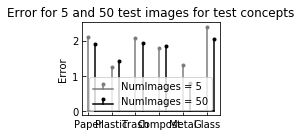

In [31]:
plt.close('all')
barWidth = 0.3
r1 = range(1,7)
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

#t.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
fig = plt.figure(figsize =(3.5,2)) # (12,6)
#linefmt=None, markerfmt=None, basefmt=None, bottom=0, label=None
# mline1 = plt.stem(r1,[topErr[0],photoErr[0],cartErr[0]], linefmt='-',label='Model 1')
# plt.setp(mline1, color=[0.737,0.737,0.737], linewidth=1.5, markersize = 3)
# #plt.setp(sline1, linewidth=0.8)


mline2 = plt.stem(r1,error_5,label='NumImages = 5')
plt.setp(mline2, color=[0.486,0.486,0.486], linewidth=1.5, markersize = 3)

mline3 = plt.stem(r2,error_50,label='NumImages = 50')
plt.setp(mline3, color=[0,0,0], linewidth=1.5, markersize = 3)

plt.xticks(r1,allConcepts)
plt.yticks([0,1,2])
plt.tick_params(direction='in')
plt.title("Error for 5 and 50 test images for test concepts")
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
#plt.savefig('Exp3_DiffNumImages_Error.pdf')
plt.show()


In [32]:
correlation_50

[0.8791125311273522,
 0.40479140380407114,
 0.5151289246513693,
 0.6639181954905902,
 0.8719009745606465,
 0.7730519771971549]

In [40]:
cor_50,_ = stats.pearsonr(np.array(win2_50).flatten(), np.array(win1_50).flatten())
cor_5,_ = stats.pearsonr(np.array(win2_5).flatten(), np.array(win1_5).flatten())

In [43]:
print("Overall correlation for top 50 is:",cor_50)
print("Overall correlation for top 5 is:",cor_5)

Overall correlation for top 50 is: 0.6783553152733253
Overall correlation for top 5 is: 0.476553477965198


In [46]:
t = np.array(win2_5).flatten()